# Processed ERA5 Data Test

This tutorial checks the processed forecast data from ERA5. Initially, the nan values were not being recognized by NCL.

Authors:
* Jeffrey Sward (jas983@cornell.edu), Cornell University, February 2020

In [2]:
# built in python modules
import datetime
import os
import inspect
import sys

# python add-ons
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
import wrf

# Import the pvlib module
if sys.platform == 'linux':
    sys.path.append('/home/jsward/Documents/01_Research/01_Renewable_Analysis/WRF/pvlib-python')
import pvlib
from pvlib.wrfcast import WRF

# Import the optwrf module
import optwrf

/Users/swardy9230/Box Sync/01_Research/01_Renewable_Analysis/WRF_Solar_and_Wind/pvlib-python/pvlib/wrfcast.py:20: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


In [6]:
# Find the absolute file path to your pvlib installation
optwrf_abspath = os.path.dirname(os.path.abspath(inspect.getfile(optwrf)))

# absolute path to ERA data file
era_file = os.path.join(optwrf_abspath, 'data', 'ERA5_EastUS_WPD-GHI_2011-01.nc')

# Read in the ERA file using the xarray open_dataset method
era_data = xr.open_dataset(era_file)

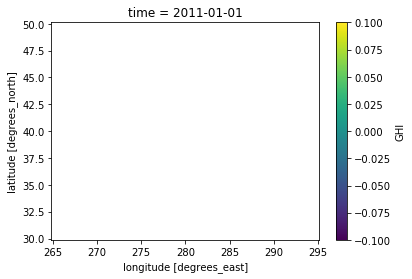

In [40]:
# Test visualization plot from processed dataset
tidx = 0
timestr = f'2011-01-01 {tidx}:00:00'
ghi = era_data.GHI.sel(time=timestr)
ghi.plot()

In [43]:
era_data.GHI[0,0,0]

<xarray.DataArray 'GHI' ()>
array(nan, dtype=float32)
Coordinates:
    time       datetime64[ns] 2011-01-01
    latitude   float64 50.0
    longitude  float64 265.0

In [49]:
era_data.sel(time=slice('2011-01-01 00:00:00', '2011-01-31 23:00:00'))

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 121, time: 744)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 30.5 30.25 30.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 294.5 294.8 295.0
Data variables:
    VAR_100U   (time, latitude, longitude) float32 ...
    VAR_100V   (time, latitude, longitude) float32 ...
    WPD        (time, latitude, longitude) float32 ...
    SSRD       (time, latitude, longitude) float32 ...
    GHI        (time, latitude, longitude) float32 ...

In [47]:
era_data.groupby('time.month')
era_data

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 121, time: 750)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-01 ... 2011-02-01T05:00:00
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 30.5 30.25 30.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 294.5 294.8 295.0
Data variables:
    VAR_100U   (time, latitude, longitude) float32 ...
    VAR_100V   (time, latitude, longitude) float32 ...
    WPD        (time, latitude, longitude) float32 ...
    SSRD       (time, latitude, longitude) float32 ...
    GHI        (time, latitude, longitude) float32 ...